In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from pandas.plotting import scatter_matrix
from matplotlib.gridspec import GridSpec
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
import string
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import tree # Import the tree module for DecisionTreeClassifier in GridSearchCV
from sklearn.metrics import accuracy_score

In [3]:
import os, re, time, zipfile, json, warnings
from pathlib import Path
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_recall_fscore_support, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB

import nltk
warnings.filterwarnings("ignore")

In [58]:
df =pd.read_csv('/content/Hotel_Reviews.csv')
df.head(5)

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,lat,lng
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,52.360576,4.915968
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,52.360576,4.915968
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,52.360576,4.915968
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,52.360576,4.915968


In [5]:
df.shape

(515738, 17)

In [6]:
print(f"Feature names : {df.columns.values}")

Feature names : ['Hotel_Address' 'Additional_Number_of_Scoring' 'Review_Date'
 'Average_Score' 'Hotel_Name' 'Reviewer_Nationality' 'Negative_Review'
 'Review_Total_Negative_Word_Counts' 'Total_Number_of_Reviews'
 'Positive_Review' 'Review_Total_Positive_Word_Counts'
 'Total_Number_of_Reviews_Reviewer_Has_Given' 'Reviewer_Score' 'Tags'
 'days_since_review' 'lat' 'lng']


In [7]:
df.isnull().sum()

,0
Hotel_Address,0
Additional_Number_of_Scoring,0
Review_Date,0
Average_Score,0
Hotel_Name,0
Reviewer_Nationality,0
Negative_Review,0
Review_Total_Negative_Word_Counts,0
Total_Number_of_Reviews,0
Positive_Review,0


In [59]:
df = df.drop(['lat', 'lng'], axis=1)
display(df.head())

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days


In [9]:
df.dropna(inplace=True)

In [10]:

print(f"Dataset shape after dropping null values : {df.shape}")

Dataset shape after dropping null values : (515738, 15)


In [60]:
df.columns.tolist(), df.head(2)

(['Hotel_Address',
  'Additional_Number_of_Scoring',
  'Review_Date',
  'Average_Score',
  'Hotel_Name',
  'Reviewer_Nationality',
  'Negative_Review',
  'Review_Total_Negative_Word_Counts',
  'Total_Number_of_Reviews',
  'Positive_Review',
  'Review_Total_Positive_Word_Counts',
  'Total_Number_of_Reviews_Reviewer_Has_Given',
  'Reviewer_Score',
  'Tags',
  'days_since_review'],
                                        Hotel_Address  \
 0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
 1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
 
    Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
 0                           194    8/3/2017            7.7  Hotel Arena   
 1                           194    8/3/2017            7.7  Hotel Arena   
 
   Reviewer_Nationality                                    Negative_Review  \
 0              Russia    I am so angry that i made this post available...   
 1             Ireland                                     

In [12]:
# Calculate the percentage of positive and negative reviews
total_reviews = len(df)
negative_percentage = (df['Negative_Review'].value_counts()['No Negative'] / total_reviews) * 100
positive_percentage = (df['Positive_Review'].value_counts()['No Positive'] / total_reviews) * 100

print(f"Percentage of Negative Reviews: {negative_percentage:.2f}%")
print(f"Percentage of Positive Reviews: {positive_percentage:.2f}%")

Percentage of Negative Reviews: 24.80%
Percentage of Positive Reviews: 6.97%


In [61]:
df["full_review"] = df["Positive_Review"].astype(str) + " " + df["Negative_Review"].astype(str)

# Map reviewer score to sentiment
def score_to_sentiment(score):
    if score <= 4.0:
        return "negative"
    elif score < 7.0:
        return "neutral"
    else:
        return "positive"

df["sentiment"] = df["Reviewer_Score"].apply(score_to_sentiment)

In [62]:
df['sentiment']

,sentiment
0,negative
1,positive
2,positive
3,negative
4,neutral
...,...
515733,positive
515734,neutral
515735,negative
515736,positive


In [69]:

df = df[df["full_review"].str.strip().astype(bool)]


In [70]:
df["review"] = df["Negative_Review"] + df["Positive_Review"]
df["review"] = df["review"].str.replace("No Negative", "")
df["review"] = df["review"].str.replace("No Positive", "")
df

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,full_review,sentiment,review
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,Only the park outside of the hotel was beauti...,negative,I am so angry that i made this post available...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,No real complaints the hotel was great great ...,positive,No real complaints the hotel was great great ...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,Location was good and staff were ok It is cut...,positive,Rooms are nice but for elderly a bit difficul...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,Great location in nice surroundings the bar a...,negative,My room was dirty and I was afraid to walk ba...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,Amazing location and building Romantic settin...,neutral,You When I booked with your company on line y...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515733,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/30/2015,8.1,Atlantis Hotel Vienna,Kuwait,no trolly or staff to help you take the lugga...,14,2823,location,2,8,7.0,"[' Leisure trip ', ' Family with older childre...",704 day,location no trolly or staff to help you take...,positive,no trolly or staff to help you take the lugga...
515734,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/22/2015,8.1,Atlantis Hotel Vienna,Estonia,The hotel looks like 3 but surely not 4,11,2823,Breakfast was ok and we got earlier check in,11,12,5.8,"[' Leisure trip ', ' Family with young childre...",712 day,Breakfast was ok and we got earlier check in ...,neutral,The hotel looks like 3 but surely not 4 Brea...
515735,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/19/2015,8.1,Atlantis Hotel Vienna,Egypt,The ac was useless It was a hot week in vienn...,19,2823,No Positive,0,3,2.5,"[' Leisure trip ', ' Family with older childre...",715 day,No Positive The ac was useless It was a hot w...,negative,The ac was useless It was a hot week in vienn...
515736,Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 ...,168,8/17/2015,8.1,Atlantis Hotel Vienna,Mexico,No Negative,0,2823,The rooms are enormous and really comfortable...,25,3,8.8,"[' Leisure trip ', ' Group ', ' Standard Tripl...",717 day,The rooms are enormous and really comfortable...,positive,The rooms are enormous and really comfortable...


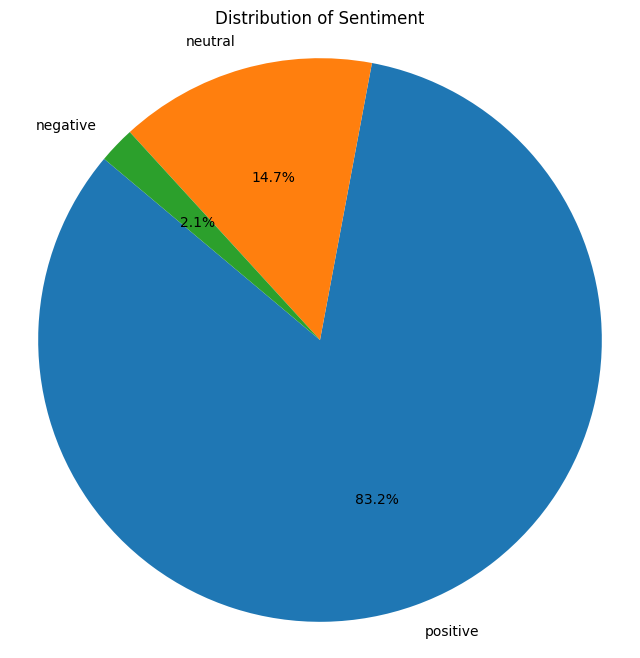

In [17]:
import matplotlib.pyplot as plt

# Calculate the value counts for the 'sentiment' column
sentiment_counts = df['sentiment'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Sentiment')
plt.axis('equal') # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [71]:
df['Negative_Review'].dropna(inplace=True)
df['Positive_Review'].dropna(inplace=True)
df['review']

,review
0,I am so angry that i made this post available...
1,No real complaints the hotel was great great ...
2,Rooms are nice but for elderly a bit difficul...
3,My room was dirty and I was afraid to walk ba...
4,You When I booked with your company on line y...
...,...
515733,no trolly or staff to help you take the lugga...
515734,The hotel looks like 3 but surely not 4 Brea...
515735,The ac was useless It was a hot week in vienn...
515736,The rooms are enormous and really comfortable...


In [72]:
df['review'] = df['review'].str.lower()
print(df['review'])

0          i am so angry that i made this post available...
1          no real complaints the hotel was great great ...
2          rooms are nice but for elderly a bit difficul...
3          my room was dirty and i was afraid to walk ba...
4          you when i booked with your company on line y...
                                ...                        
515733     no trolly or staff to help you take the lugga...
515734     the hotel looks like 3 but surely not 4  brea...
515735     the ac was useless it was a hot week in vienn...
515736     the rooms are enormous and really comfortable...
515737     i was in 3rd floor it didn t work free wife  ...
Name: review, Length: 515679, dtype: object


In [65]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [73]:
STOPWORDS = set(stopwords.words('english'))
LEMMATIZER = WordNetLemmatizer()
STEMMER = PorterStemmer()

def basic_clean(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+", " ", text)
    text = re.sub(r"@\w+|#\w+", " ", text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r"\d+", " ", text)
    return text

def tokenize(text):
    return text.split()

def remove_stopwords(tokens):
    return [t for t in tokens if t not in STOPWORDS and len(t) > 1]

def stem_tokens(tokens):
    return [STEMMER.stem(t) for t in tokens]

def lemmatize_tokens(tokens):
    return [LEMMATIZER.lemmatize(t) for t in tokens]

def clean_text_pipeline(text, use_stemming=True, use_lemmatization=False):
    text = basic_clean(text)
    tokens = tokenize(text)
    tokens = remove_stopwords(tokens)
    if use_lemmatization:
        tokens = lemmatize_tokens(tokens)
    if use_stemming:
        tokens = stem_tokens(tokens)
    return " ".join(tokens)

df["clean_text"] = df['review'].apply(lambda x: clean_text_pipeline(x, use_stemming=True, use_lemmatization=False))
display(df.head())

,Hotel_Address,Additional_Number_of_Scoring,Review_Date,Average_Score,Hotel_Name,Reviewer_Nationality,Negative_Review,Review_Total_Negative_Word_Counts,Total_Number_of_Reviews,Positive_Review,Review_Total_Positive_Word_Counts,Total_Number_of_Reviews_Reviewer_Has_Given,Reviewer_Score,Tags,days_since_review,full_review,sentiment,review,clean_text
0,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Russia,I am so angry that i made this post available...,397,1403,Only the park outside of the hotel was beauti...,11,7,2.9,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,Only the park outside of the hotel was beauti...,negative,i am so angry that i made this post available...,angri made post avail via possibl site use pla...
1,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,8/3/2017,7.7,Hotel Arena,Ireland,No Negative,0,1403,No real complaints the hotel was great great ...,105,7,7.5,"[' Leisure trip ', ' Couple ', ' Duplex Double...",0 days,No real complaints the hotel was great great ...,positive,no real complaints the hotel was great great ...,real complaint hotel great great locat surroun...
2,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,Australia,Rooms are nice but for elderly a bit difficul...,42,1403,Location was good and staff were ok It is cut...,21,9,7.1,"[' Leisure trip ', ' Family with young childre...",3 days,Location was good and staff were ok It is cut...,positive,rooms are nice but for elderly a bit difficul...,room nice elderli bit difficult room two stori...
3,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/31/2017,7.7,Hotel Arena,United Kingdom,My room was dirty and I was afraid to walk ba...,210,1403,Great location in nice surroundings the bar a...,26,1,3.8,"[' Leisure trip ', ' Solo traveler ', ' Duplex...",3 days,Great location in nice surroundings the bar a...,negative,my room was dirty and i was afraid to walk ba...,room dirti afraid walk barefoot floor look cle...
4,s Gravesandestraat 55 Oost 1092 AA Amsterdam ...,194,7/24/2017,7.7,Hotel Arena,New Zealand,You When I booked with your company on line y...,140,1403,Amazing location and building Romantic setting,8,3,6.7,"[' Leisure trip ', ' Couple ', ' Suite ', ' St...",10 days,Amazing location and building Romantic settin...,neutral,you when i booked with your company on line y...,book compani line show pictur room thought get...


In [25]:
df['clean_text']

,clean_text
0,angri made post avail via possibl site use pla...
1,real complaint hotel great great locat surroun...
2,room nice elderli bit difficult room two stori...
3,room dirti afraid walk barefoot floor look cle...
4,book compani line show pictur room thought get...
...,...
515733,trolli staff help take luggag room locat
515734,hotel look like sure breakfast ok got earlier ...
515735,ac useless hot week vienna gave hot air
515736,room enorm realli comfort believ famili member...


In [26]:
from collections import Counter
# Count the frequency of stopwords in the original reviews
stopword_counts = Counter()
for review in df['clean_text']:
    for word in review.split():
        if word.lower() in STOPWORDS:
            stopword_counts[word.lower()] += 1

print("Top 20 most frequent stopwords:")
for word, count in stopword_counts.most_common(20):
    print(f"{word}: {count}")


Top 20 most frequent stopwords:
other: 1923
will: 1314
that: 464
not: 236
up: 110
until: 103
own: 98
over: 98
can: 95
an: 94
in: 88
there: 83
what: 62
all: 59
am: 59
out: 55
with: 46
your: 26
down: 25
on: 22


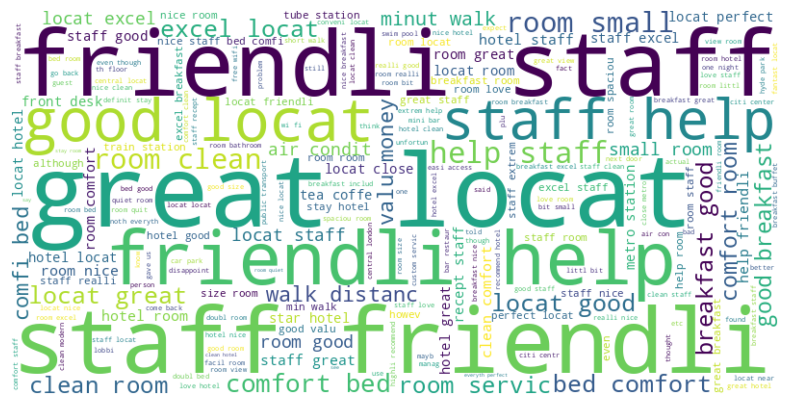

In [27]:
# Create a word cloud from the cleaned text
all_clean_text = " ".join(df["clean_text"])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_clean_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

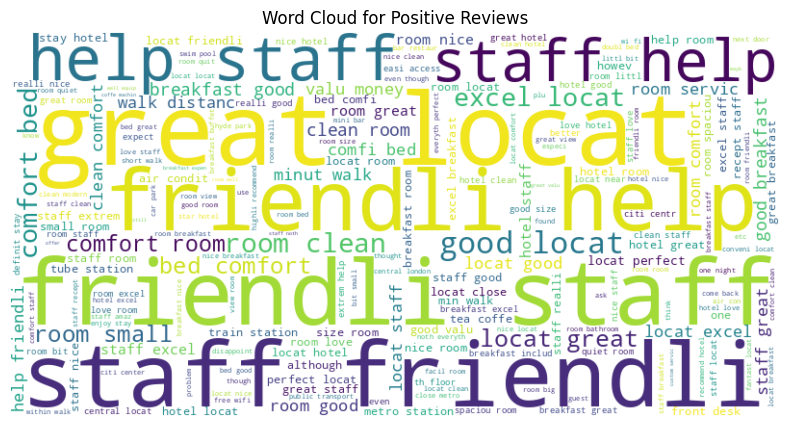

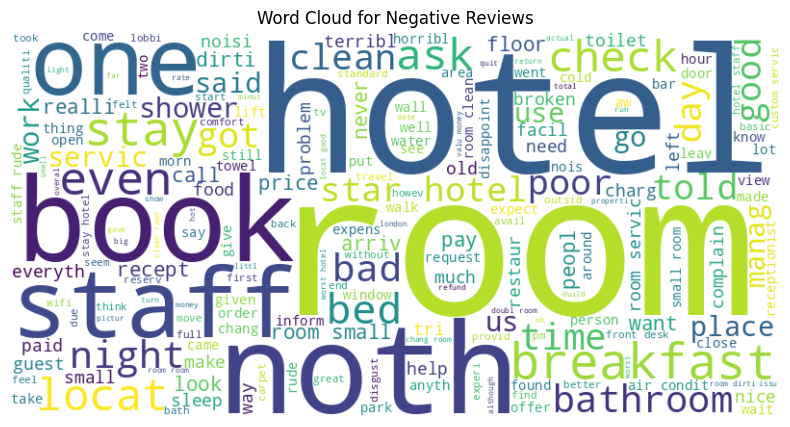

In [74]:

positive_reviews = df[df['sentiment'] == 'positive']['clean_text']
negative_reviews = df[df['sentiment'] == 'negative']['clean_text']

# word cloud for positive reviews
all_positive_text = " ".join(positive_reviews)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(all_positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Reviews')
plt.show()

#  word cloud for negative reviews
all_negative_text = " ".join(negative_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(all_negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Reviews')
plt.show()

In [30]:
sample_df = df.groupby("sentiment").apply(lambda x: x.sample(n=8000, random_state=42)).reset_index(drop=True)

# Split into train and test
X = sample_df["clean_text"].values
y = sample_df["sentiment"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [31]:
vectorizers = {
    "BoW": CountVectorizer(max_features=10000, ngram_range=(1,2), min_df=5),
    "TFIDF": TfidfVectorizer(max_features=10000, ngram_range=(1,2), min_df=5)
}

In [32]:

models = {
    "Multinomial Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(max_depth=20, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, max_depth=20, random_state=42)
}

In [33]:
# Train and evaluate all combinations
results = []
for vec_name, vec in vectorizers.items():
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train_vec, y_train)
        y_pred = model.predict(X_test_vec)
        acc = accuracy_score(y_test, y_pred)
        pr, rc, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="macro")
        results.append({
            "Vectorizer": vec_name,
            "Model": model_name,
            "Accuracy": acc,
            "Precision": pr,
            "Recall": rc,
            "F1 Score": f1
        })

# Create a results table
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
results_df

,Vectorizer,Model,Accuracy,Precision,Recall,F1 Score
0,TFIDF,Logistic Regression,0.675417,0.675488,0.675417,0.675443
1,TFIDF,Multinomial Naive Bayes,0.674167,0.671482,0.674167,0.672589
2,BoW,Multinomial Naive Bayes,0.669375,0.665291,0.669375,0.666662
3,BoW,Logistic Regression,0.647917,0.647135,0.647917,0.647472
4,BoW,Random Forest,0.637083,0.626908,0.637083,0.627203
5,TFIDF,Random Forest,0.632708,0.625032,0.632708,0.626999
6,BoW,Decision Tree,0.561250,0.563954,0.561250,0.560739
7,TFIDF,Decision Tree,0.548125,0.575795,0.548125,0.553605


using different approach to improve accuracy

In [34]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower() # Convert to lowercase
    text = re.sub(r'\W', ' ', text) # Remove non-alphanumeric characters
    text = re.sub(r'\s+', ' ', text) # Remove multiple spaces
    tokens = text.split() # Tokenize
    tokens = [word for word in tokens if word not in stop_words] # Remove stop words
    tokens = [lemmatizer.lemmatize(word) for word in tokens] # Lemmatize
    return ' '.join(tokens)

# Apply preprocessing to the review columns
df['cleaned_negative_review'] = df['Negative_Review'].apply(preprocess_text)
df['cleaned_positive_review'] = df['Positive_Review'].apply(preprocess_text)

print("Text preprocessing complete.")
display(df[['Negative_Review', 'cleaned_negative_review', 'Positive_Review', 'cleaned_positive_review']].head())

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


Text preprocessing complete.


,Negative_Review,cleaned_negative_review,Positive_Review,cleaned_positive_review
0,I am so angry that i made this post available...,angry made post available via possible site us...,Only the park outside of the hotel was beauti...,park outside hotel beautiful
1,No Negative,negative,No real complaints the hotel was great great ...,real complaint hotel great great location surr...
2,Rooms are nice but for elderly a bit difficul...,room nice elderly bit difficult room two story...,Location was good and staff were ok It is cut...,location good staff ok cute hotel breakfast ra...
3,My room was dirty and I was afraid to walk ba...,room dirty afraid walk barefoot floor looked c...,Great location in nice surroundings the bar a...,great location nice surroundings bar restauran...
4,You When I booked with your company on line y...,booked company line showed picture room though...,Amazing location and building Romantic setting,amazing location building romantic setting


In [35]:
from sklearn.model_selection import train_test_split

# Combine positive and negative reviews for a single text column
df['cleaned_reviews'] = df['cleaned_negative_review'] + " " + df['cleaned_positive_review']

# based on the Reviewer_Score. We can set a threshold, e.g., score >= 7 is positive (1), else negative (0).

df['sentiment'] = df['Reviewer_Score'].apply(lambda x: 1 if x >= 7 else 0)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_reviews'], df['sentiment'], test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print(f"Training set size: {len(X_train)}")
print(f"Testing set size: {len(X_test)}")

Data split into training and testing sets.
Training set size: 412543
Testing set size: 103136


In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000 ,min_df=0,
                    max_df=1,
                    use_idf= True,
                    ngram_range= (1, 3))
# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)

# Transform the testing data
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print("Text data converted to TF-IDF features.")
print(f"Shape of training features: {X_train_tfidf.shape}")
print(f"Shape of testing features: {X_test_tfidf.shape}")

Text data converted to TF-IDF features.
Shape of training features: (412543, 5000)
Shape of testing features: (103136, 5000)


In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Initialize and train a Logistic Regression model
# You can experiment with different parameters
log_reg_model = LogisticRegression(max_iter=1000) # Increased max_iter for convergence

log_reg_model.fit(X_train_tfidf, y_train)

print("Logistic Regression model trained.")

# Predict on the testing set
y_pred_log_reg = log_reg_model.predict(X_test_tfidf)

# Evaluate the model
print("Logistic Regression Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log_reg)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_log_reg))

Logistic Regression model trained.
Logistic Regression Model Evaluation:
Accuracy: 0.8802745888923363
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.48      0.58     17527
           1       0.90      0.96      0.93     85609

    accuracy                           0.88    103136
   macro avg       0.81      0.72      0.75    103136
weighted avg       0.87      0.88      0.87    103136



In [42]:
# Train and evaluate all combinations
results = []
for vec_name, vec in vectorizers.items():
    # Assuming X_train and X_test contain the cleaned text data (e.g., from 'clean_text' column)
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)

    for model_name, model in models.items():
        print(f"Training {model_name} with {vec_name}...")
        try:
            model.fit(X_train_vec, y_train)
            y_pred = model.predict(X_test_vec)
            acc = accuracy_score(y_test, y_pred)
            # Use 'weighted' average for precision, recall, f1 for multi-class
            pr, rc, f1, _ = precision_recall_fscore_support(y_test, y_pred, average="weighted")
            results.append({
                "Vectorizer": vec_name,
                "Model": model_name,
                "Accuracy": acc,
                "Precision": pr,
                "Recall": rc,
                "F1 Score": f1
            })
            print(f"{model_name} with {vec_name} - Accuracy: {acc:.4f}, F1 Score: {f1:.4f}")
        except Exception as e:
            print(f"Training {model_name} with {vec_name} failed: {e}")

Training Multinomial Naive Bayes with BoW...
Multinomial Naive Bayes with BoW - Accuracy: 0.8388, F1 Score: 0.8484
Training Logistic Regression with BoW...
Logistic Regression with BoW - Accuracy: 0.8837, F1 Score: 0.8746
Training Decision Tree with BoW...
Decision Tree with BoW - Accuracy: 0.8522, F1 Score: 0.8276
Training Random Forest with BoW...
Random Forest with BoW - Accuracy: 0.8332, F1 Score: 0.7606
Training Multinomial Naive Bayes with TFIDF...
Multinomial Naive Bayes with TFIDF - Accuracy: 0.8745, F1 Score: 0.8660
Training Logistic Regression with TFIDF...
Logistic Regression with TFIDF - Accuracy: 0.8854, F1 Score: 0.8769
Training Decision Tree with TFIDF...
Decision Tree with TFIDF - Accuracy: 0.8533, F1 Score: 0.8305
Training Random Forest with TFIDF...
Random Forest with TFIDF - Accuracy: 0.8329, F1 Score: 0.7598


In [44]:
# Create a results table
results_df = pd.DataFrame(results).sort_values(by="F1 Score", ascending=False).reset_index(drop=True)
print("\n--- Model Comparison Table ---")
display(results_df)


--- Model Comparison Table ---


,Vectorizer,Model,Accuracy,Precision,Recall,F1 Score
0,TFIDF,Logistic Regression,0.885404,0.876536,0.885404,0.876888
1,BoW,Logistic Regression,0.883668,0.874362,0.883668,0.874553
2,TFIDF,Multinomial Naive Bayes,0.874467,0.864011,0.874467,0.866011
3,BoW,Multinomial Naive Bayes,0.838795,0.865653,0.838795,0.848364
4,TFIDF,Decision Tree,0.853252,0.832878,0.853252,0.830477
5,BoW,Decision Tree,0.852234,0.831254,0.852234,0.827600
6,BoW,Random Forest,0.833181,0.855722,0.833181,0.760591
7,TFIDF,Random Forest,0.832852,0.855919,0.832852,0.759783


In [46]:
# Save results
out_csv_ml = "/content/ml_model_results_summary.csv"
results_df.to_csv(out_csv_ml, index=False)
print(f"\nSaved results to {out_csv_ml}")


Saved results to /content/ml_model_results_summary.csv


Using NLP models

In [51]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, GRU, Dense, Bidirectional, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import precision_recall_fscore_support

In [78]:


# Prepare data for deep learning models
max_words = 15000 # Reduced max_words to avoid memory issues
tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['clean_text'])
sequences = tokenizer.texts_to_sequences(df['clean_text'])
maxlen = 200
X = pad_sequences(sequences, maxlen=maxlen, padding='post', truncating='post')

# Map sentiment labels to numerical values (0, 1, 2)
sentiment_mapping = {"negative": 0, "neutral": 1, "positive": 2}
df["sentiment_numerical"] = df["sentiment"].map(sentiment_mapping)


# Check the shape of the DataFrame after dropping NaNs
print(f"Shape of DataFrame after dropping NaNs: {df.shape}")

# Re-map X and y to the cleaned dataframe
X = pad_sequences(tokenizer.texts_to_sequences(df['clean_text']), maxlen=maxlen, padding='post', truncating='post')
y = df["sentiment_numerical"].values


# Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print("Train/Test shapes:", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Define small models and train (SimpleRNN, LSTM, GRU, Bidirectional LSTM, Stacked LSTM)
vocab_size = min(max_words, len(tokenizer.word_index)+1)
embedding_dim = 64

def build_simple_rnn():
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=maxlen),
        SimpleRNN(64),
        Dense(len(sentiment_mapping), activation='softmax') # Changed to use the number of sentiment classes
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Changed loss
    return model

def build_lstm():
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=maxlen),
        LSTM(64),
        Dense(len(sentiment_mapping), activation='softmax') # Changed to use the number of sentiment classes
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Changed loss
    return model

def build_gru():
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=maxlen),
        GRU(64),
        Dense(len(sentiment_mapping), activation='softmax') # Changed to use the number of sentiment classes
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Changed loss
    return model

def build_bidirectional_lstm():
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=maxlen),
        Bidirectional(LSTM(64)),
        Dense(len(sentiment_mapping), activation='softmax') # Changed to use the number of sentiment classes
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Changed loss
    return model

def build_stacked_lstm():
    model = Sequential([
        Embedding(vocab_size, embedding_dim, input_length=maxlen),
        LSTM(64, return_sequences=True),
        LSTM(32),
        Dense(len(sentiment_mapping), activation='softmax') # Changed to use the number of sentiment classes
    ])
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) # Changed loss
    return model

models_to_run = {
    'SimpleRNN': build_simple_rnn,
    'LSTM': build_lstm,
    'GRU': build_gru,
    'BiLSTM': build_bidirectional_lstm,
    'StackedLSTM': build_stacked_lstm
}

histories = {}
results = {}

# Train each model for a small number of epochs to demonstrate.
es = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

for name, builder in models_to_run.items():
    print(f"\n\nTraining {name} ...")
    model = builder()
    try:
        history = model.fit(X_train, y_train, epochs=4, batch_size=128, validation_split=0.15, callbacks=[es], verbose=2)
    except Exception as e:
        print(f"Training {name} failed:", e)
        history = None
    histories[name] = history
    # evaluate
    try:
        preds_prob = model.predict(X_test, batch_size=256)
        preds = np.argmax(preds_prob, axis=1) # Changed to get the index of the max probability
        acc = accuracy_score(y_test, preds)
        # Precision, recall, f1 for multi-class
        from sklearn.metrics import classification_report
        report = classification_report(y_test, preds, target_names=sentiment_mapping.keys(), output_dict=True, zero_division=0) # Added zero_division=0
        prec = report['weighted avg']['precision']
        rec = report['weighted avg']['recall']
        f1 = report['weighted avg']['f1-score']
        # ROC AUC for multi-class (requires one-hot encoding or probability estimates)
        try:
            from sklearn.preprocessing import label_binarize
            y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
            auc = roc_auc_score(y_test_bin, preds_prob, multi_class='ovr')
        except Exception as auc_e:
            print(f"AUC calculation failed for {name}: {auc_e}")
            auc = None

        results[name] = {'accuracy':acc, 'precision':prec, 'recall':rec, 'f1':f1, 'roc_auc':auc}
        print(name, "->", results[name])
    except Exception as e:
        print("Evaluation failed for", name, e)

# Prepare comparison table
results_df_nlp = pd.DataFrame.from_dict(results, orient='index')
results_df_nlp = results_df_nlp[['accuracy','precision','recall','f1','roc_auc']]
results_df_nlp = results_df_nlp.reset_index().rename(columns={'index':'model'})
print("\nNLP Model comparison:")
display(results_df_nlp)

Shape of DataFrame after dropping NaNs: (515679, 20)
Train/Test shapes: (412543, 200) (103136, 200) (412543,) (103136,)


Training SimpleRNN ...
Epoch 1/4
2740/2740 - 275s - 100ms/step - accuracy: 0.8317 - loss: 0.5183 - val_accuracy: 0.8298 - val_loss: 0.5208
Epoch 2/4
2740/2740 - 321s - 117ms/step - accuracy: 0.8318 - loss: 0.5176 - val_accuracy: 0.8298 - val_loss: 0.5205
Epoch 3/4
2740/2740 - 322s - 118ms/step - accuracy: 0.8319 - loss: 0.5172 - val_accuracy: 0.8298 - val_loss: 0.5205
Epoch 4/4
2740/2740 - 270s - 98ms/step - accuracy: 0.8319 - loss: 0.5170 - val_accuracy: 0.8298 - val_loss: 0.5223
403/403 ━━━━━━━━━━━━━━━━━━━━ 21s 52ms/step
SimpleRNN -> {'accuracy': 0.8316009928637915, 'precision': 0.6915602113320438, 'recall': 0.8316009928637915, 'f1': 0.7551428657512987, 'roc_auc': np.float64(0.5020994680960822)}


Training LSTM ...
Epoch 1/4
2740/2740 - 998s - 364ms/step - accuracy: 0.8316 - loss: 0.5177 - val_accuracy: 0.8298 - val_loss: 0.5205
Epoch 2/4
2740/2740 - 1015s - 370ms

,model,accuracy,precision,recall,f1,roc_auc
0,SimpleRNN,0.831601,0.691560,0.831601,0.755143,0.502099
1,LSTM,0.869318,0.842599,0.869318,0.854817,0.908275
2,GRU,0.874253,0.865221,0.874253,0.867397,0.916317
3,BiLSTM,0.874030,0.858481,0.874030,0.862400,0.916087
4,StackedLSTM,0.872082,0.858055,0.872082,0.859741,0.910885
